<a href="https://colab.research.google.com/github/Sumuk2208/Pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch workflow

In [36]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data preparation and loading

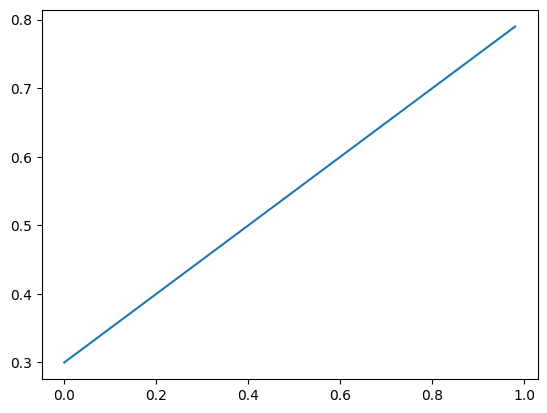

In [37]:
w=0.5
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=w*X+bias
plt.plot(X,y)

### train test split

In [38]:
train=int(0.8*len(X))
X_train,y_train=X[:train],y[:train]
X_test,y_test=X[train:],y[train:]


##Training

In [39]:
def plot_pred(x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(x_train,y_train,c="b",s=4,label="training data")
  plt.scatter(x_test,y_test,c="g",s=4,label="test data")
  if not predictions is None:
    plt.scatter(x_test,predictions,c="r",s=4,label="predictions")
  plt.legend(prop={"size":14})

In [40]:
#Build Regression model
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)
    )
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)
    )
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias

In [41]:
torch.manual_seed(42)
model=LinearRegression()
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

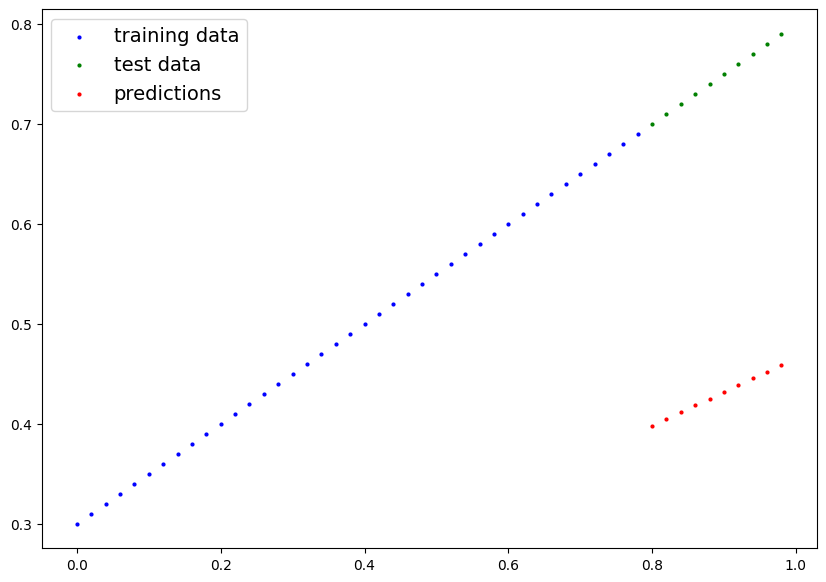

In [44]:
import torch
with torch.inference_mode():
  pred=model(X_test)
  plot_pred(predictions=pred)